# Redback Operations

# Elderly Wearable Tech - Heart Attack Prediction

In this project, we will explore and build a predictive model for heart attack risk classification using a large, structured dataset. The goal is to identify individuals who may be at higher risk of experiencing a heart attack based on various health and lifestyle factors.


Real-time health monitoring through wearable technology offers a vital opportunity to detect and prevent life-threatening conditions like heart attacks. Building a predictive model that can be integrated into such devices to identify individuals at risk based on physiological, lifestyle, and medical history data could be very beneficial. Using a large dataset, we carried out data cleaning, encoding, and scaling, followed by exploratory analysis to understand key patterns. We trained and compared Logistic Regression and Random Forest models, evaluated their performance, and analyzed feature importance to identify which factors most influence heart attack risk.

In [26]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


## Dataset Overview

The dataset has 372,974 records and 32 features capturing a wide range of patient information. All columns were found to be complete with no missing values and a mix of numerical and categorical data types. It seems to show realistic distributions for key indicators like age, cholesterol, blood pressure, and heart rate. The target variable outcome indicates whether a patient has experienced a heart attack or not. This early understanding of the data helps guide the preprocessing and model development steps that follow.

In [28]:
# Loading dataset
df = pd.read_csv('heart_attack_dataset.csv')

# Dataset Overview
print("Dataset Shape:", df.shape)
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())
print("\nSummary Statistics:\n", df.describe())
print("\nFirst 5 Rows:\n", df.head())

Dataset Shape: (372974, 32)

Data Types:
 Age                        int64
Gender                    object
Cholesterol                int64
BloodPressure              int64
HeartRate                  int64
BMI                      float64
Smoker                     int64
Diabetes                   int64
Hypertension               int64
FamilyHistory              int64
PhysicalActivity           int64
AlcoholConsumption         int64
Diet                      object
StressLevel                int64
Ethnicity                 object
Income                     int64
EducationLevel            object
Medication                object
ChestPainType             object
ECGResults                object
MaxHeartRate               int64
ST_Depression            float64
ExerciseInducedAngina     object
Slope                     object
NumberOfMajorVessels       int64
Thalassemia               object
PreviousHeartAttack        int64
StrokeHistory              int64
Residence                 object
E

## Data Cleaning 

We convert the Outcome column into a binary format by having "Heart Attack" to 1 and "No Heart Attack" to 0. We then identified all categorical columns and applied label encoding to convert them into numerical values to make them suitable for machine learning algorithms. Then we split the data into features (X) and target (y) and perform an 80-20 train-test split to allow for proper model evaluation.  Standard scaling is also applied to the features to normalize the range of values and ensure fair treatment of all variables during model training.

In [2]:
df_cleaned = df.copy()

# Encoding for the target variable
df_cleaned['Outcome'] = df_cleaned['Outcome'].apply(lambda x: 1 if x == 'Heart Attack' else 0)

categorical_cols = df_cleaned.select_dtypes(include=['object']).columns.tolist()

le = LabelEncoder()
for col in categorical_cols:
    df_cleaned[col] = le.fit_transform(df_cleaned[col])



In [36]:
# Splitting into features and target
X = df_cleaned.drop('Outcome', axis=1)
y = df_cleaned['Outcome']

# Splitting into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## Visualizations

We now examine the age distribution of individuals in the dataset. The histogram shows a fairly uniform distribution of age between 30 and 84. This indicates that the dataset is balanced across a wide age range. This also ensures that the model will have exposure to patterns across all age groups which is important for detecting heart attack risk in both younger and older populations.

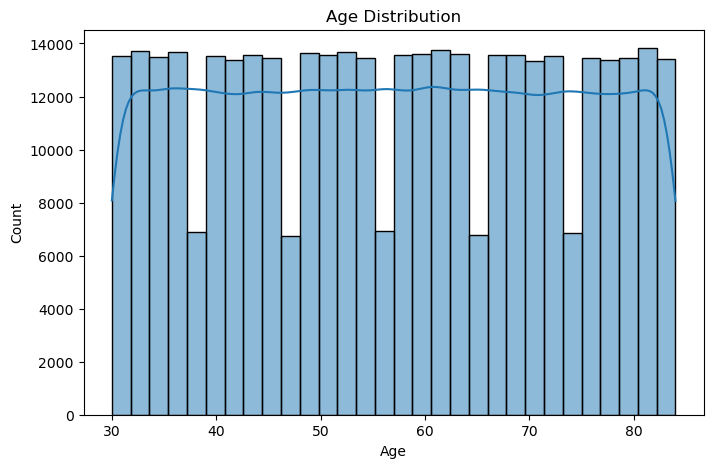

In [4]:


plt.figure(figsize=(8, 5))
sns.histplot(df_cleaned['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()



The bar plot shows the distribution of the target variable Outcome where 0 represents no heart attack and 1 indicates a heart attack. The classes seem nearly perfectly balanced which is good for training classification models. 

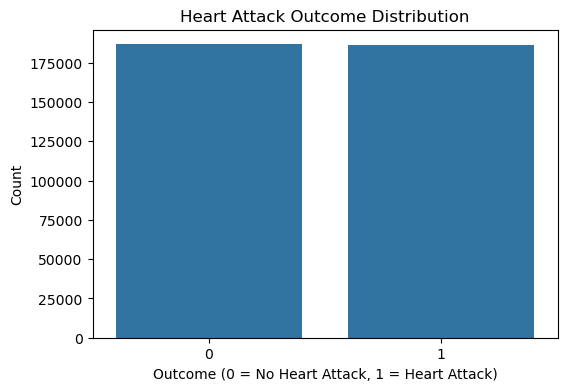

In [40]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Outcome', data=df_cleaned)
plt.title('Heart Attack Outcome Distribution')
plt.xlabel('Outcome (0 = No Heart Attack, 1 = Heart Attack)')
plt.ylabel('Count')
plt.show()


The boxplot compares cholesterol levels between patients who did and did not experience a heart attack. Both groups have similar median values and overlapping ranges but individuals who had heart attacks show slightly more variation. It seems like cholesterol alone doesn’t clearly separate the two classes, but it may still play a role when combined with other features in a predictive model.

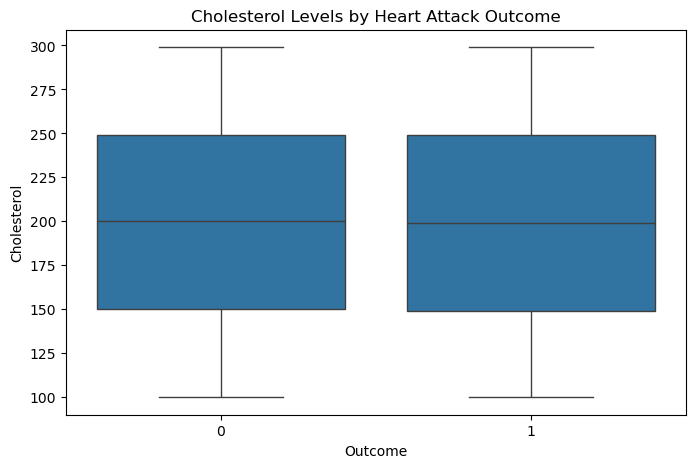

In [6]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Outcome', y='Cholesterol', data=df_cleaned)
plt.title('Cholesterol Levels by Heart Attack Outcome')
plt.xlabel('Outcome')
plt.ylabel('Cholesterol')
plt.show()


The correlation heatmap gives an overview of the linear relationships between all numerical features in the dataset. Most features show weak or minimal correlation with one another and with the target variable Outcome. No single feature stands out as strongly correlated with heart attack risk in the dataset

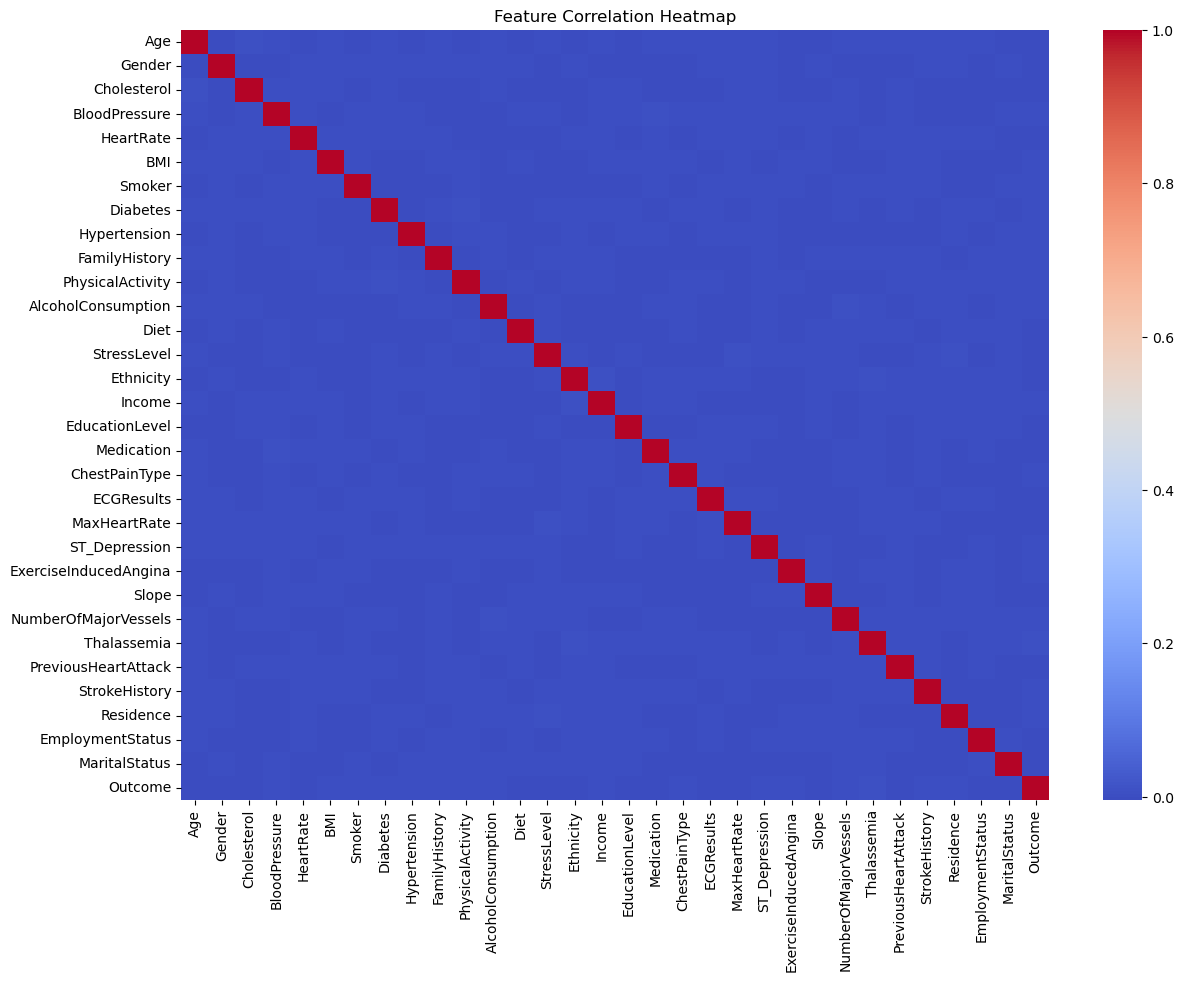

In [7]:
plt.figure(figsize=(14, 10))
correlation_matrix = df_cleaned.corr()
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False)
plt.title('Feature Correlation Heatmap')
plt.show()


# Model building 

## Random Forest 

We trained a Random Forest classifier to predict heart attack risk using the preprocessed dataset. The model achieved an accuracy of 50%  with precision and recall values balanced across both classes. The confusion matrix shows a near-equal number of true positives and false positives which suggests the model is struggling to distinguish between the two outcomes. Future improvements need to be made through feature selection and hyperparameter tuning.

In [44]:
# Training the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluating performance
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.54      0.52     37592
           1       0.50      0.46      0.48     37003

    accuracy                           0.50     74595
   macro avg       0.50      0.50      0.50     74595
weighted avg       0.50      0.50      0.50     74595

Confusion Matrix:
 [[20178 17414]
 [19850 17153]]


We extracted feature importances from the trained Random Forest. The top contributors included Income, ST_Depression, BMI, Cholesterol, and MaxHeartRate, among others. This insight could potentially help prioritize which signals should be more closely monitored in wearable health applications.

/var/folders/d5/0f6cysrd3td2hgtd5hcnr9cm0000gn/T/ipykernel_8390/2329748283.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_imp_df.head(15), palette='viridis')


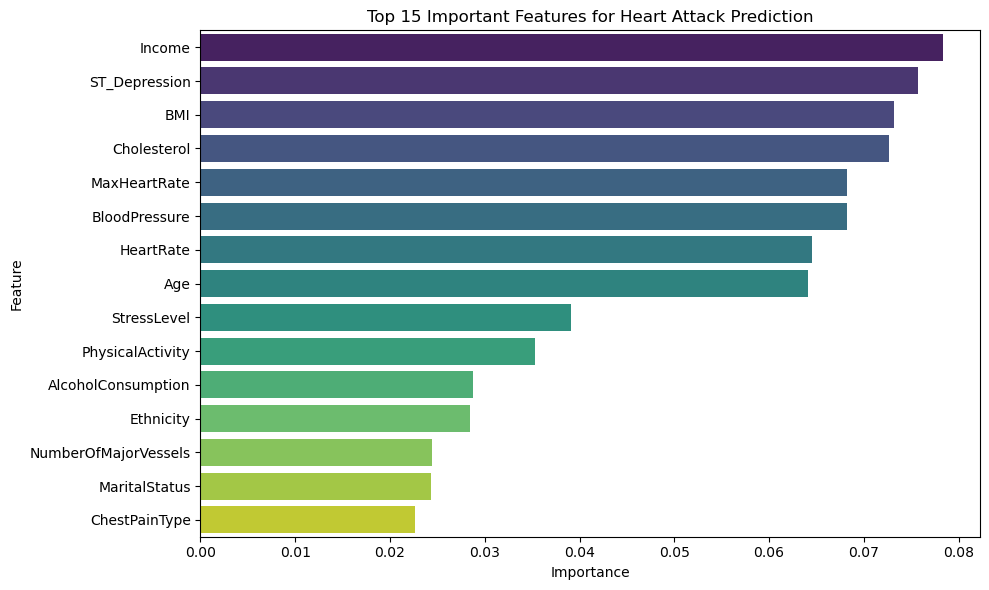

In [47]:
# Feature importances and column names
importances = rf_model.feature_importances_
feature_names = X.columns

# Creating DataFrame for easier plotting
feature_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot top 15 most important features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_imp_df.head(15), palette='viridis')
plt.title('Top 15 Important Features for Heart Attack Prediction')
plt.tight_layout()
plt.show()


## Logistic Regression

We also trained a Logistic Regression model as a baseline linear classifier. The model achieved an accuracy of 50% similar to the Random Forest. Interestingly, it showed slightly higher recall for predicting heart attacks but slightly lower for non-heart attack cases. These results suggest that while Logistic Regression performance is limited on this dataset, and more complex models are probably better to improve predictions.









In [10]:

# Training Logistic Regression
log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train_scaled, y_train)

# Predict
y_pred_log = log_model.predict(X_test_scaled)

# Evaluate
print("🔹 Logistic Regression\n")
print(classification_report(y_test, y_pred_log))


🔹 Logistic Regression

              precision    recall  f1-score   support

           0       0.51      0.47      0.49     37592
           1       0.50      0.54      0.52     37003

    accuracy                           0.50     74595
   macro avg       0.50      0.50      0.50     74595
weighted avg       0.50      0.50      0.50     74595



In [11]:
def evaluate_model(name, y_true, y_pred):
    return {
        'Model': name,
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'F1 Score': f1_score(y_true, y_pred)
    }

# Gathering results
results = [
    evaluate_model("Logistic Regression", y_test, y_pred_log),
    evaluate_model("Random Forest", y_test, y_pred_rf)
]
results_df = pd.DataFrame(results)
results_df.sort_values(by='F1 Score', ascending=False)


,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.500972,0.497215,0.535605,0.515697
1,Random Forest,0.500449,0.496225,0.463557,0.479335


## Conclusion

After applying both Random Forest and Logistic Regression models, both models achieved an accuracy of around 50%. Neither showed strong predictive power suggesting the complexity of the problem and the need for more advanced modeling techniques.

To improve performance moving forward, we need to explore more powerful models such as Gradient Boosting which is maybe better at handling structured data well. Additionally, techniques like feature selection, hyperparameter tuning, or ensemble methods could help refine model performance. We could also explore deep learning methods moving forward as that is much more appropriate here. 
